In [1]:
import os
import pandas as pd

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/mef_nir_mef_Kd_UV/'

data = pd.read_csv(workdir + 'MEF.csv')

In [2]:
for name in data.columns[2:]:
    x = data[name][310:410]  - data[data.columns[1]][310:410]
    y = sum(x)/len(x)
    data[name] = data[name] - y

In [3]:
data.columns

Index(['Unnamed: 0', 'H2O', 'MEF_0.5', 'MEF_1', 'MEF_1.5', 'MEF_2', 'MEF_2.5',
       'MEF_3', 'MEF_3.5', 'MEF_4', 'MEF_4_prot_0.5', 'MEF_4_prot_1',
       'MEF_4_prot_2', 'MEF_4_prot_3', 'MEF_4_prot_4', 'MEF_4_prot_5',
       'MEF_4_prot_6', 'MEF_4_prot_8', 'MEF_4_prot_10', 'MEF_4_prot_12',
       'MEF_4_prot_14', 'MEF_4_prot_16', 'MEF_4_prot_20', 'MEF_4_prot_24',
       'MEF_4_prot_28', 'MEF_4_prot_32', 'MEF_4_prot_36', 'MEF_4_prot_40',
       'MEF_4_prot_44', 'MEF_4_prot_48', 'MEF_4_prot_52', 'MEF_4_prot_56',
       'MEF_4_prot_56.1'],
      dtype='object')

(-0.05, 0.2)

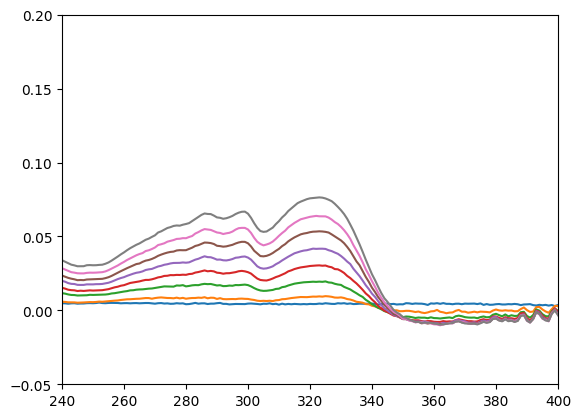

In [4]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
for name in data.columns[1:9]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 400])
plt.ylim([-0.05, 0.2])

336
[[0.00126103]
 [0.00251889]
 [0.00377358]
 [0.00502513]
 [0.00627353]
 [0.0075188 ]
 [0.00876095]
 [0.01      ]]
0.9911630769371597
-0.0038411580974802226
[5.59560172]


(-0.05, 0.1)

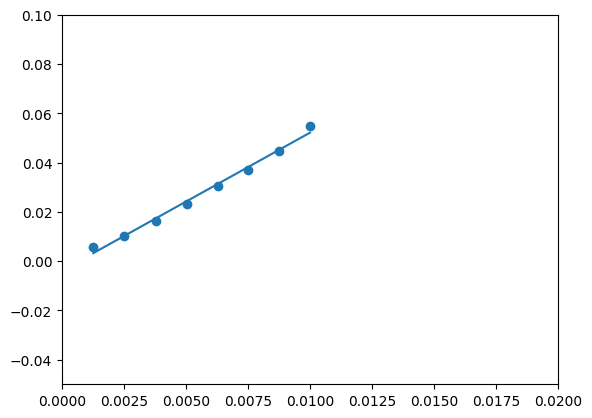

In [7]:

mef_xs = [ 0.5/396.5, 1/397, 1.5/397.5, 2/398, 2.5/398.5, 3/399, 3.5/399.5, 4/400]
mef_ys = data.iloc[336-190, 2:10]


print(data.iloc[336-190, 0])

import numpy as np
from sklearn.linear_model import LinearRegression
mef_xs_re = np.array(mef_xs).reshape(-1, 1)
mef_reg_336 = LinearRegression().fit(mef_xs_re, mef_ys)
print(mef_xs_re)
print(mef_reg_336.score(mef_xs_re, mef_ys))
print(mef_reg_336.intercept_)
print(mef_reg_336.coef_)

fig,ax = plt.subplots()
ax.scatter(mef_xs, mef_ys)
mef_ys_336_pred = np.array([mef_reg_336.predict(np.array(xr).reshape(1, -1)) for xr in mef_xs_re])

ax.plot(mef_xs_re, mef_ys_336_pred)
plt.xlim([0, 0.02])
plt.ylim([-0.05, 0.1])

(-0.05, 0.2)

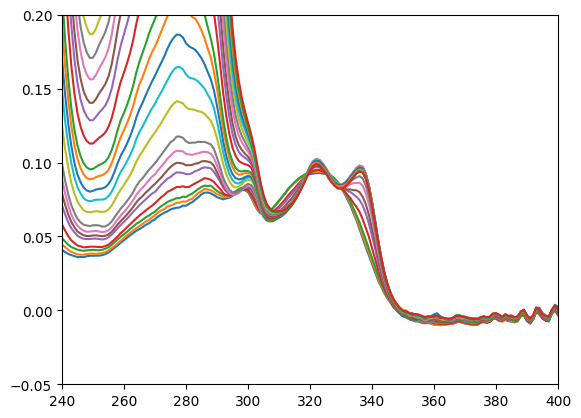

In [8]:
fig,ax = plt.subplots()
for name in data.columns[9:]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 400])
plt.ylim([-0.05, 0.2])

599_400_2
599_402_4
599_404_6
599_406_8
599_408_10
599_410_12
599_400_2.1
599_402_4.1
599_404_6.1
599_406_8.1
599_408_10.1
599_410_12.1
[0, 0.005, 0.009950248756218905, 0.01485148514851485, 0.019704433497536946, 0.024509803921568627, 0.02926829268292683]


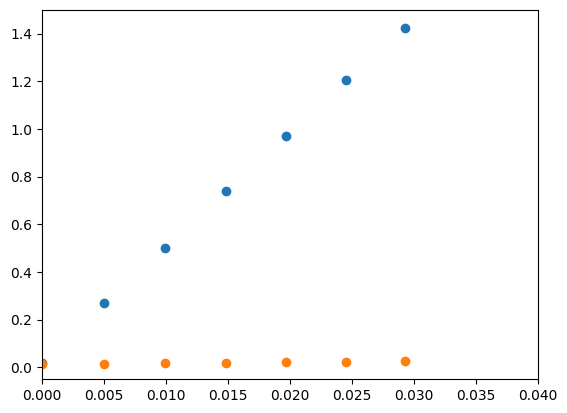

In [9]:
prot599 = pd.read_csv(workdir + '230402_protein_conc_599.csv')

prot599.columns

for name in prot599.columns[2:8]:
    print(name)
    x = prot599[name][310:410]  - prot599[prot599.columns[1]][310:410]
    y = sum(x)/len(x)
    prot599[name] = prot599[name] - y

for name in prot599.columns[9:]:
    print(name)
    x = prot599[name][310:410]  - prot599[prot599.columns[8]][310:410]
    y = sum(x)/len(x)
    prot599[name] = prot599[name] - y


fig,ax = plt.subplots()
xs = [0, 2/400, 4/402, 6/404, 8/406, 10/408, 12/410]
ys_280 = prot599.iloc[280-190, 8:]
ys_336 = prot599.iloc[336-190, 8:]
ax.scatter(xs, ys_280)
ax.scatter(xs, ys_336)

plt.xlim([0, 0.04])
plt.ylim([-0.05, 1.5])
print(xs)

In [10]:
xs_re = np.array(xs).reshape(-1, 1)
reg_280 = LinearRegression().fit(xs_re, ys_280)
print(xs_re)
print(reg_280.score(xs_re, ys_280))
print(reg_280.intercept_)

ys_280_corr = ys_280 - reg_280.intercept_
prot_conc = ys_280_corr/11460*1000*1000
print(prot_conc)
factors = [400/2, 402/4, 404/6, 406/8, 408/10, 410/12]
prot_conc_stock = []
for i in range(6):
    prot_conc_stock.append(prot_conc[i+1]*factors[i])
print(prot_conc)
print(prot_conc_stock)
print(np.mean(prot_conc_stock[1:]))

[[0.        ]
 [0.005     ]
 [0.00995025]
 [0.01485149]
 [0.01970443]
 [0.0245098 ]
 [0.02926829]]
0.9999311693175621
0.023628449991735745
TBS2             -0.434997
599_400_2.1      21.400639
599_402_4.1      41.679165
599_404_6.1      62.413799
599_406_8.1      82.479540
599_408_10.1    103.220482
599_410_12.1    122.295010
Name: 90, dtype: float64
TBS2             -0.434997
599_400_2.1      21.400639
599_402_4.1      41.679165
599_404_6.1      62.413799
599_406_8.1      82.479540
599_408_10.1    103.220482
599_410_12.1    122.295010
Name: 90, dtype: float64
[4280.127848137247, 4188.756072575092, 4202.529150929301, 4185.836667923378, 4211.395663635705, 4178.412829706141]
4193.386076953922


[[0.        ]
 [0.005     ]
 [0.00995025]
 [0.01485149]
 [0.01970443]
 [0.0245098 ]
 [0.02926829]]
0.9913188140340604
0.012784574538113325
[0.42756909]


(-0.05, 0.1)

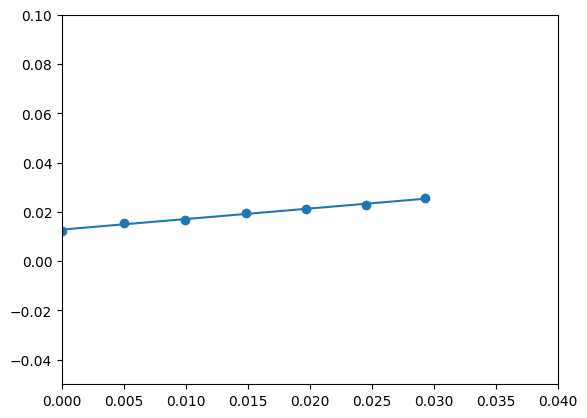

In [11]:
reg_336 = LinearRegression().fit(xs_re, ys_336)
print(xs_re)
print(reg_336.score(xs_re, ys_336))
print(reg_336.intercept_)
print(reg_336.coef_)


fig,ax = plt.subplots()
ys_336 = prot599.iloc[336-190, 8:]
ax.scatter(xs_re, ys_336)
ys_336_pred = np.array([reg_336.predict(np.array(xr).reshape(1, -1)) for xr in xs_re])

ax.plot(xs_re, ys_336_pred)
plt.xlim([0, 0.04])
plt.ylim([-0.05, 0.1])

TBS2             -0.434997
599_400_2.1      21.400639
599_402_4.1      41.679165
599_404_6.1      62.413799
599_406_8.1      82.479540
599_408_10.1    103.220482
599_410_12.1    122.295010
Name: 90, dtype: float64
TBS2            0.012337
599_400_2.1     0.015612
599_402_4.1     0.016686
599_404_6.1     0.019438
599_406_8.1     0.021282
599_408_10.1    0.022872
599_410_12.1    0.025427
Name: 146, dtype: float64
[0.000102]
0.012783364254941795


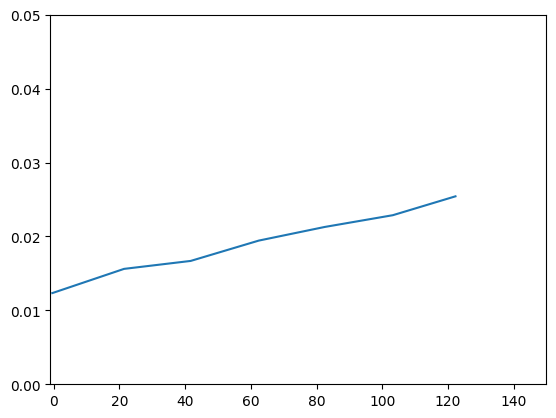

In [12]:
fig,ax = plt.subplots()
reg_prot_336_conc = LinearRegression().fit(np.array(prot_conc).reshape(-1, 1), ys_336)
print(prot_conc)
print(ys_336)
ax.plot(prot_conc, ys_336)
plt.xlim([-1, 150])
plt.ylim([0, 0.05])
print(reg_prot_336_conc.coef_)
print(reg_prot_336_conc.intercept_)

[0.0, 0.5234706616729089, 1.045635910224439, 1.5665006226650064, 2.0860696517412936, 3.121339950372209, 4.151485148514851, 5.176543209876543, 6.196551724137931, 8.221568627450981, 10.226829268292683, 12.212621359223302, 16.126923076923077, 19.966666666666665, 23.733962264150946, 27.430841121495327, 31.05925925925926, 34.62110091743119, 38.11818181818182, 41.55225225225225, 44.925000000000004, 48.23805309734514, 51.492982456140346, 54.69130434782609]
[0.01278336 0.01283676 0.01289001 0.01294314 0.01299613 0.01310173
 0.0132068  0.01331135 0.01341539 0.01362193 0.01382646 0.014029
 0.01442824 0.01481988 0.01520413 0.01558119 0.01595128 0.01631457
 0.01667126 0.01702152 0.01736552 0.01770344 0.01803543 0.01836164]
real_titri_ys-----------------------------------
MEF_4              0.054849
MEF_4_prot_0.5     0.056806
MEF_4_prot_1       0.059430
MEF_4_prot_2       0.066497
MEF_4_prot_3       0.074627
MEF_4_prot_4       0.079908
MEF_4_prot_5       0.086301
MEF_4_prot_6       0.090811
MEF_4_

(-0.02, 0.2)

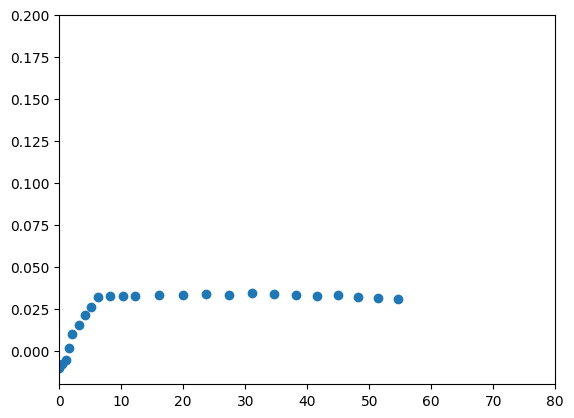

In [16]:
titri_adds = [0, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 8, 10, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60]
#print('titri_adds-----------------------------------')
#print(titri_adds)
titri_vols = [z + 400 for z in titri_adds]
#print('titri_vols-----------------------------------')
#print(titri_vols)
prot_conc_xs = [titri_adds[i]*419.3/titri_vols[i] for i in range(len(titri_adds))]
prot_conc_ys = reg_prot_336_conc.predict(np.array(prot_conc_xs).reshape(-1, 1))
print(prot_conc_xs)
print(prot_conc_ys)
mef_titri_xs = np.array([4/x for x in titri_vols]).reshape(-1, 1)
#print('mef_titri_xs-----------------------------------')
#print(mef_titri_xs)

mef_titri_ys = mef_reg_336.predict(mef_titri_xs)
#print('mef_titri_ys-----------------------------------')
#print(mef_titri_ys)

real_titri_ys = data.iloc[336-190, 9:]
print('real_titri_ys-----------------------------------')
print(real_titri_ys)


corr_titri_ys = real_titri_ys - mef_titri_ys - prot_conc_ys

fig,ax = plt.subplots()
ax.scatter(prot_conc_xs, corr_titri_ys)


plt.xlim([0, 80])
plt.ylim([-0.02, 0.2])

In [18]:
result = pd.DataFrame({'conc':prot_conc_xs, 'abs':corr_titri_ys.values})
result.to_csv(workdir + 'mef_processed.csv')